<div style="border:2px;border-style:solid;border-color:black;background-color:powderblue;font-style:italic;line-height:150%;">
    <h4>&nbsp;</h4>
    <h1 style="text-indent:5%;"><a href="https://www.youtube.com/watch?v=4AXAKUlF_3c&t">Pandas for Fun and Profit</a>&nbsp;&nbsp; &larr; Click here for video.</h1>
    <h2 style="line-height:150%;">
       <ul>
          <li>This jupyter notebook is intended to accompany the talk<br>that I gave at 2019 PyCon Israel and at 2019 PyLondinium.</li>
       </ul>
    </h2>
</div>    

<div style="border:2px;border-style:solid;border-color:black;background-color:lightgreen;font-style:italic;line-height:150%;">
    <h4>&nbsp;</h4>
    <h1 style="text-indent:5%;">Conclusions</h1>
    <h2 style="line-height:150%;">
       <ul>
          <li>Pandas makes it easy to explore data, to shape, analyze, and visualize your data!</li>
          <li>Know your domain/data</li>
          <li>Plan to spend 50% or more of time "shaping" your data.</li>
        </ul>
    </h2>
</div>

In [1]:
# Import pandas, display version, register pandas matplotlib converters:
import pandas as pd
print("Using pandas version",pd.__version__)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Using pandas version 0.24.2


In [2]:
# Additional imports
%matplotlib inline
import matplotlib as mpl
print("Using matplotlib version",mpl.__version__)
import numpy as np
print("using numpy version",np.__version__)

Using matplotlib version 3.0.3
using numpy version 1.16.2


In [3]:
# This allows output from multiple ipython commands in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
print("========================================")
print(" Create a Pandas Series and display it:")
print("========================================")

dates  = ['2016-10-04','2016-10-05','2016-10-06']
prices = [ 113.0, 113.05, 113.89 ]
dtindx = pd.DatetimeIndex(dates,name='Date')
myseries = pd.Series(prices,index=dtindx,name='AAPL')
myseries

 Create a Pandas Series and display it:


Date
2016-10-04    113.00
2016-10-05    113.05
2016-10-06    113.89
Name: AAPL, dtype: float64

In [5]:
print('\nlen(myseries)=',len(myseries))
print("\nmyseries.loc['2016-10-06']=",myseries.loc['2016-10-06'])
print("\nmyseries.iloc[0]=",myseries.iloc[0])


len(myseries)= 3

myseries.loc['2016-10-06']= 113.89

myseries.iloc[0]= 113.0


In [6]:
print("==========================================")
print(" Create a Pandas DataFrame and display it:")
print("==========================================")
prices={'AAPL':[ 113.0, 113.05, 113.89 ],
        'CSCO':[ 31.35,  31.59,  31.48 ],
        'MSFT':[ 57.24,  57.64,  57.74 ] }
df = pd.DataFrame(prices,index=dtindx)  # dtindx is from a cell above
df

 Create a Pandas DataFrame and display it:


,AAPL,CSCO,MSFT
Date,,,
2016-10-04,113.00,31.35,57.24
2016-10-05,113.05,31.59,57.64
2016-10-06,113.89,31.48,57.74


In [7]:
df.index
type(df.index)

DatetimeIndex(['2016-10-04', '2016-10-05', '2016-10-06'], dtype='datetime64[ns]', name='Date', freq=None)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
df.columns
type(df.columns)

Index(['AAPL', 'CSCO', 'MSFT'], dtype='object')

pandas.core.indexes.base.Index

In [9]:
df.shape
type(df.shape)

(3, 3)

tuple

In [10]:
df.loc['2016-10-05','AAPL']

113.05

In [11]:
df.loc['2016-10-05']

AAPL    113.05
CSCO     31.59
MSFT     57.64
Name: 2016-10-05 00:00:00, dtype: float64

In [12]:
print("================================================")
print(" Create another Pandas DataFrame and concatenate")
print(" it with the first, creating a Multi-Index:"     )
print("================================================")
volumes={'AAPL':[ 29736800, 21453100, 28779000 ],
         'CSCO':[ 18460400, 11808600, 14077100 ],
         'MSFT':[ 20085900, 16726400, 16212600 ] }
vdf = pd.DataFrame(volumes,index=dtindx)
vdf

 Create another Pandas DataFrame and concatenate
 it with the first, creating a Multi-Index:


,AAPL,CSCO,MSFT
Date,,,
2016-10-04,29736800,18460400,20085900
2016-10-05,21453100,11808600,16726400
2016-10-06,28779000,14077100,16212600


In [13]:
midf = pd.concat([df,vdf], axis=1, keys=['Price','Volume'])
midf

Price                  Volume                    
              AAPL   CSCO   MSFT      AAPL      CSCO      MSFT
Date                                                          
2016-10-04  113.00  31.35  57.24  29736800  18460400  20085900
2016-10-05  113.05  31.59  57.64  21453100  11808600  16726400
2016-10-06  113.89  31.48  57.74  28779000  14077100  16212600

In [14]:
midf.swaplevel(0, 1, axis=1).sort_index(axis=1)

AAPL             CSCO             MSFT          
             Price    Volume  Price    Volume  Price    Volume
Date                                                          
2016-10-04  113.00  29736800  31.35  18460400  57.24  20085900
2016-10-05  113.05  21453100  31.59  11808600  57.64  16726400
2016-10-06  113.89  28779000  31.48  14077100  57.74  16212600

<div style="border:2px;border-style:solid;border-color:black;background-color:lightgreen;font-style:italic;line-height:150%;">    <h1 style="text-indent:5%;">Hypothesis</h1>
    <h2 style="line-height:150%;">
       <ul>
          <li>Low P/E represents a bargain</li>
          <li>If so, buying stocks with low P/E shoul result in higher returns</li>
          <li>TEST: Compare P/E to RETURNS over time.</li>
        </ul>
    </h2>
</div>

<div style="border:2px;border-style:solid;border-color:black;border-left: 5px solid #dfb5b4;background-color:#ffe6b3;line-height:150%;"> 
    <h1 style="text-indent:5%;">INFORMATION, NOT ADVICE</h1>
    <h3 style="line-height:150%;text-indent:5%;">
        This content, and any presentation thereof, is for informational purposes only.  Any such information (or its associated material) should not in any way be construed as investment, financial, or other advice. Nothing contained in this presentation or its materials constitutes a solicitation, recommendation, endorsement of, or offer to buy or sell any securities or other financial instruments in this or in in any other
jurisdiction.<br>
    </h3>

</div>

<div style="border:2px;border-style:solid;border-color:black;background-color:lightgreen;font-style:italic;line-height:150%;">     <h1 style="text-indent:4%;">Choose Data to represent the Market:</h1>
    <h1 style="text-indent:7%;">The 30 Stocks in the Dow Jones Industrial Average</h1>
    <hr width=90%;>
    <h1 style="text-indent:4%;">Data we will need for these 30 stocks:</h1>
    <h2 style="line-height:150%;">
       <ul>
          <li>Price/Earnings ratios over time</li>
          <li>Calculate RETURN over time</li>
             <ul>
               <li>Prices over time</li>
               <li>Dividends over time</li>
           </ul>
        </ul>
    </h2>

</div>

In [15]:
print('===========================================')
print(' Read the Price/Earnings csv file "plain": ')
print('===========================================')
df = pd.read_csv("data/indu_pe_1989-2018.csv",header=None)
df.head(8)

 Read the Price/Earnings csv file "plain": 


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Start Date,1/1/1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,End Date,12/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AAPL UW Equity,AXP UN Equity,BA UN Equity,CAT UN Equity,CSCO UW Equity,CVX UN Equity,DIS UN Equity,DWDP UN Equity,GS UN Equity,...,PG UN Equity,TRV UN Equity,UNH UN Equity,UTX UN Equity,V UN Equity,VZ UN Equity,WBA UW Equity,WMT UN Equity,XOM UN Equity,INDU Index
4,NaN,Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),...,Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E),Price Earnings Ratio (P/E)
5,Dates,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,...,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO,PE_RATIO
6,1/31/1989,NaN,NaN,15.7649,10.1768,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4575,NaN,NaN,NaN,NaN,NaN,NaN,11.7405,NaN
7,2/28/1989,NaN,NaN,15.3918,9.6628,NaN,NaN,NaN,NaN,NaN,...,NaN,7.3416,NaN,NaN,NaN,NaN,NaN,NaN,11.1076,NaN


In [16]:
print('==========================================================')
print(' Re-read the P/E csv file, specifying header, index, etc:' )
print('==========================================================')
df = pd.read_csv("data/indu_pe_1989-2018.csv",
                 header=3,
                 index_col=0,
                 parse_dates=True,
                 skiprows=[4,5])
df.head()

 Re-read the P/E csv file, specifying header, index, etc:


,AAPL UW Equity,AXP UN Equity,BA UN Equity,CAT UN Equity,CSCO UW Equity,CVX UN Equity,DIS UN Equity,DWDP UN Equity,GS UN Equity,HD UN Equity,...,PG UN Equity,TRV UN Equity,UNH UN Equity,UTX UN Equity,V UN Equity,VZ UN Equity,WBA UW Equity,WMT UN Equity,XOM UN Equity,INDU Index
1989-01-31,NaN,NaN,15.7649,10.1768,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4575,NaN,NaN,NaN,NaN,NaN,NaN,11.7405,NaN
1989-02-28,NaN,NaN,15.3918,9.6628,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.3416,NaN,NaN,NaN,NaN,NaN,NaN,11.1076,NaN
1989-03-31,NaN,NaN,16.3082,9.0531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.2932,NaN,NaN,NaN,NaN,NaN,NaN,10.2035,NaN
1989-04-28,NaN,NaN,18.1004,9.5880,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.5940,NaN,NaN,NaN,NaN,NaN,NaN,10.0581,NaN
1989-05-31,NaN,NaN,19.2055,10.1030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.5940,NaN,NaN,NaN,NaN,NaN,NaN,10.0291,NaN


In [17]:
print('=================')
print(' Name the Index:' )
print('=================')
df.index.name = 'Date'
df.head(3)

 Name the Index:


,AAPL UW Equity,AXP UN Equity,BA UN Equity,CAT UN Equity,CSCO UW Equity,CVX UN Equity,DIS UN Equity,DWDP UN Equity,GS UN Equity,HD UN Equity,...,PG UN Equity,TRV UN Equity,UNH UN Equity,UTX UN Equity,V UN Equity,VZ UN Equity,WBA UW Equity,WMT UN Equity,XOM UN Equity,INDU Index
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-31,NaN,NaN,15.7649,10.1768,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4575,NaN,NaN,NaN,NaN,NaN,NaN,11.7405,NaN
1989-02-28,NaN,NaN,15.3918,9.6628,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.3416,NaN,NaN,NaN,NaN,NaN,NaN,11.1076,NaN
1989-03-31,NaN,NaN,16.3082,9.0531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.2932,NaN,NaN,NaN,NaN,NaN,NaN,10.2035,NaN


In [18]:
print('==========================================================')
print(' Take a closer look at the columns, to see\n how we can clean up or shorten the column names:')
print('==========================================================')
df.columns

 Take a closer look at the columns, to see
 how we can clean up or shorten the column names:


Index(['AAPL UW Equity', 'AXP UN Equity', 'BA UN Equity', 'CAT UN Equity',
       'CSCO UW Equity', 'CVX UN Equity', 'DIS UN Equity', 'DWDP UN Equity',
       'GS UN Equity', 'HD UN Equity', 'IBM UN Equity', 'INTC UW Equity',
       'JNJ UN Equity', 'JPM UN Equity', 'KO UN Equity', 'MCD UN Equity',
       'MMM UN Equity', 'MRK UN Equity', 'MSFT UW Equity', 'NKE UN Equity',
       'PFE UN Equity', 'PG UN Equity', 'TRV UN Equity', 'UNH UN Equity',
       'UTX UN Equity', 'V UN Equity', 'VZ UN Equity', 'WBA UW Equity',
       'WMT UN Equity', 'XOM UN Equity', 'INDU Index'],
      dtype='object')

<!--<div style="border:2px;border-style:solid;border-color:black;background-color:lightgreen;font-style:italic;line-height:150%;"> -->
<!--<div style="border:1px;border-style:solid;border-color:black;background-color:lightgreen;font-family:monospace;line-height:200%;"> -->
<div style="border:2px;border-style:solid;border-color:black;font-family:monospace;background-color:#FEF9E7;line-height:150%;">
    <p>&nbsp;</p>
    <p style="text-indent:5%;font-weight: bold;">  Notice, in the above cell (before the cell below has run), the last column says "INDU Index" (<i>not</i> "INDU Equity").  All of the other column names say "Equity."  That last column contains the P/E ratio for the Dow Jones Industrials "Index" itself, not for an individual stock. (Note: "Equity" is another word for "Stock"). Later we will drop this "INDU" column.
    </p>
&nbsp;
</div>

In [19]:
print('=====================================================================')
print(' Use a list comprehension to grab the first token (the Ticker Symbol)') 
print(' from each column name, and reassign back to the dataframe columns:  ')
print('=====================================================================')
df.columns = [x.split()[0] for x in df.columns]
df.columns

 Use a list comprehension to grab the first token (the Ticker Symbol)
 from each column name, and reassign back to the dataframe columns:  


Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GS', 'HD',
       'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
       'INDU'],
      dtype='object')

In [20]:
df.head(4)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,INDU
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-31,NaN,NaN,15.7649,10.1768,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4575,NaN,NaN,NaN,NaN,NaN,NaN,11.7405,NaN
1989-02-28,NaN,NaN,15.3918,9.6628,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.3416,NaN,NaN,NaN,NaN,NaN,NaN,11.1076,NaN
1989-03-31,NaN,NaN,16.3082,9.0531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.2932,NaN,NaN,NaN,NaN,NaN,NaN,10.2035,NaN
1989-04-28,NaN,NaN,18.1004,9.5880,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.5940,NaN,NaN,NaN,NaN,NaN,NaN,10.0581,NaN


In [21]:
df.shape

(360, 31)

In [22]:
df.drop('INDU',axis=1,inplace=True)
df.head(3)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-31,NaN,NaN,15.7649,10.1768,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.4575,NaN,NaN,NaN,NaN,NaN,NaN,11.7405
1989-02-28,NaN,NaN,15.3918,9.6628,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.3416,NaN,NaN,NaN,NaN,NaN,NaN,11.1076
1989-03-31,NaN,NaN,16.3082,9.0531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.2932,NaN,NaN,NaN,NaN,NaN,NaN,10.2035


In [23]:
df.shape

(360, 30)

In [24]:
df.tail(3)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,18.4960,24.6947,22.5387,11.0997,18.7380,15.6084,16.4935,14.7244,8.7815,18.9754,...,18.2799,21.8772,13.7844,22.6631,16.3757,31.5751,12.8348,15.3241,20.7287,18.3425
2018-11-30,15.0919,26.9880,22.0242,12.4126,19.6063,16.6275,16.5883,15.7976,7.4302,19.4545,...,19.6256,23.3154,14.3616,24.3982,16.0633,32.4593,13.5565,15.7086,20.1850,18.3011
2018-12-31,12.9878,11.2377,18.0140,11.1878,17.7468,12.8033,15.8175,14.5333,6.4857,18.5374,...,27.0197,22.2320,13.4065,20.4364,13.6045,28.9023,11.1576,12.6771,19.2549,13.7177


In [25]:
print('============================================================================')
print(' Define the P/E dataframe as the most recent 12 years (144 months) of data:')
print('============================================================================')
pedf = df.iloc[-144:]
pedf.head(3)
pedf.tail(3)

 Define the P/E dataframe as the most recent 12 years (144 months) of data:


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,30.9495,20.1453,22.0591,12.1806,23.9550,9.1904,20.4132,NaN,10.7641,15.4905,...,12.7379,23.0854,8.6186,17.3046,18.2849,NaN,15.6472,NaN,16.4448,11.3130
2007-02-28,30.5451,19.6782,21.4951,12.2471,23.3694,8.6520,19.8850,NaN,9.4648,15.0570,...,12.1165,22.5943,8.6034,17.2848,17.6425,NaN,15.2045,NaN,16.6552,10.9435
2007-03-30,29.3091,18.4314,20.5335,12.6711,23.0000,9.2566,19.3024,NaN,9.7009,13.9696,...,11.7488,21.6301,8.5712,17.1981,16.8831,NaN,14.9466,NaN,16.1897,11.0956


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,18.4960,24.6947,22.5387,11.0997,18.7380,15.6084,16.4935,14.7244,8.7815,18.9754,...,18.2799,21.8772,13.7844,22.6631,16.3757,31.5751,12.8348,15.3241,20.7287,18.3425
2018-11-30,15.0919,26.9880,22.0242,12.4126,19.6063,16.6275,16.5883,15.7976,7.4302,19.4545,...,19.6256,23.3154,14.3616,24.3982,16.0633,32.4593,13.5565,15.7086,20.1850,18.3011
2018-12-31,12.9878,11.2377,18.0140,11.1878,17.7468,12.8033,15.8175,14.5333,6.4857,18.5374,...,27.0197,22.2320,13.4065,20.4364,13.6045,28.9023,11.1576,12.6771,19.2549,13.7177


In [26]:
pedf.shape

(144, 30)

In [27]:
type(pedf.iloc[0,0])

numpy.float64

In [28]:
type(pedf.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
pedf.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,25.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,124.000000,144.000000,49.000000,144.000000,144.000000
mean,18.135728,17.018117,16.015704,16.456440,16.156933,19.837657,17.450703,21.571120,11.331267,19.472149,...,14.156956,19.279000,10.717726,15.036556,16.131736,28.520182,14.946363,18.445402,15.593640,15.667203
std,7.746895,5.919784,5.201220,6.298471,3.595349,21.918411,2.943092,3.231646,4.243340,4.199639,...,3.964105,2.551134,3.089557,5.527816,2.350672,4.073837,2.888870,4.039751,2.210513,7.428544
min,9.892100,4.385500,5.071000,4.348100,10.523200,5.339500,8.220600,14.533300,5.562200,10.779600,...,5.065800,13.609800,6.626000,6.638500,8.215300,21.306400,10.589200,11.682700,12.010900,8.054600
25%,13.410625,13.583175,13.242975,12.230475,13.746100,9.240050,15.816575,20.032800,9.153650,15.939675,...,11.256825,17.061875,8.564500,10.228200,14.849125,25.502925,12.722400,15.708600,14.086300,11.153650
50%,16.073100,15.723900,16.221900,14.615900,15.089900,10.961150,17.393800,22.938500,10.170800,20.480050,...,15.222450,19.396750,9.879950,14.152400,16.665650,28.371700,14.335050,18.112200,15.242100,12.385700
75%,18.941825,18.207275,19.624000,21.062150,18.247000,17.215850,19.389800,23.799000,11.789150,22.991000,...,17.236500,21.126150,11.935225,20.152425,17.935200,30.946725,17.133075,20.807300,16.586975,17.869400
max,48.456600,34.743000,29.465000,33.187000,26.488000,110.849700,24.862600,25.368200,28.398300,27.189700,...,27.019700,24.203400,19.786300,26.077000,20.309900,39.353300,23.669100,27.894500,24.172300,40.794400


In [30]:
pedf.count()

AAPL    144
AXP     144
BA      144
CAT     144
CSCO    144
CVX     144
DIS     144
DWDP     25
GS      144
HD      144
IBM     144
INTC    144
JNJ     144
JPM     144
KO      144
MCD     144
MMM     144
MRK     144
MSFT    144
NKE     144
PFE     144
PG      144
TRV     144
UNH     144
UTX     144
V       124
VZ      144
WBA      49
WMT     144
XOM     144
dtype: int64

In [31]:
pedf.count() < 144

AAPL    False
AXP     False
BA      False
CAT     False
CSCO    False
CVX     False
DIS     False
DWDP     True
GS      False
HD      False
IBM     False
INTC    False
JNJ     False
JPM     False
KO      False
MCD     False
MMM     False
MRK     False
MSFT    False
NKE     False
PFE     False
PG      False
TRV     False
UNH     False
UTX     False
V        True
VZ      False
WBA      True
WMT     False
XOM     False
dtype: bool

In [32]:
countLT144 = pedf.count() < 144
cols_with_less_than_144 = pedf.columns[countLT144]
cols_with_less_than_144

Index(['DWDP', 'V', 'WBA'], dtype='object')

In [33]:

pedf = pedf.drop(cols_with_less_than_144,axis=1)
pedf.head(3)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,30.9495,20.1453,22.0591,12.1806,23.9550,9.1904,20.4132,10.7641,15.4905,16.2808,...,25.0894,18.8210,12.7379,23.0854,8.6186,17.3046,18.2849,15.6472,16.4448,11.3130
2007-02-28,30.5451,19.6782,21.4951,12.2471,23.3694,8.6520,19.8850,9.4648,15.0570,15.2726,...,22.9024,22.2751,12.1165,22.5943,8.6034,17.2848,17.6425,15.2045,16.6552,10.9435
2007-03-30,29.3091,18.4314,20.5335,12.6711,23.0000,9.2566,19.3024,9.7009,13.9696,15.1543,...,19.9071,22.6567,11.7488,21.6301,8.5712,17.1981,16.8831,14.9466,16.1897,11.0956


In [34]:
pedf.mean()

AAPL    18.135728
AXP     17.018117
BA      16.015704
CAT     16.456440
CSCO    16.156933
CVX     19.837657
DIS     17.450703
GS      11.331267
HD      19.472149
IBM     12.283763
INTC    14.682974
JNJ     16.184714
JPM     12.702983
KO      19.749747
MCD     19.223497
MMM     18.294041
MRK     18.522142
MSFT    16.939769
NKE     22.799566
PFE     14.156956
PG      19.279000
TRV     10.717726
UNH     15.036556
UTX     16.131736
VZ      14.946363
WMT     15.593640
XOM     15.667203
dtype: float64

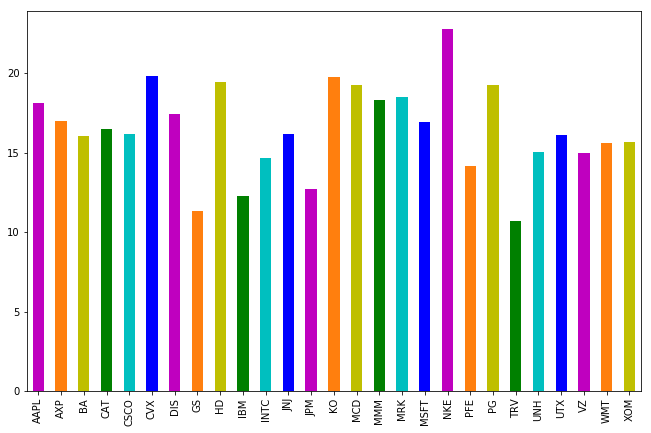

In [35]:
FIGSIZE = (11, 7)
COLORS  = ['m','tab:orange','y','g','c','b']
pedf.mean().plot.bar(color=COLORS,figsize=FIGSIZE)

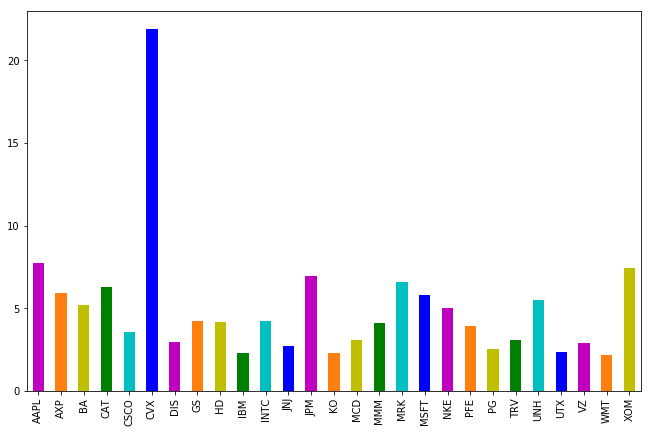

In [36]:
pedf.std().plot.bar(color=COLORS,figsize=FIGSIZE)

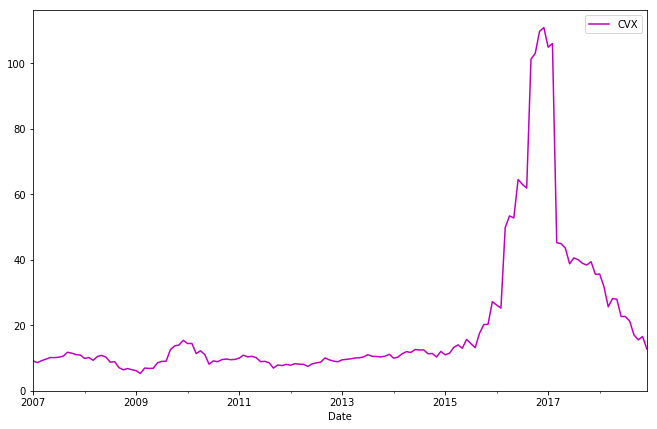

In [37]:
pedf.plot(y='CVX',color=COLORS,figsize=FIGSIZE)  # Chevron Corp

In [38]:
pedf = pedf.drop('CVX',axis=1)
pedf.head(3)

,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,30.9495,20.1453,22.0591,12.1806,23.9550,20.4132,10.7641,15.4905,16.2808,23.8182,...,25.0894,18.8210,12.7379,23.0854,8.6186,17.3046,18.2849,15.6472,16.4448,11.3130
2007-02-28,30.5451,19.6782,21.4951,12.2471,23.3694,19.8850,9.4648,15.0570,15.2726,22.5568,...,22.9024,22.2751,12.1165,22.5943,8.6034,17.2848,17.6425,15.2045,16.6552,10.9435
2007-03-30,29.3091,18.4314,20.5335,12.6711,23.0000,19.3024,9.7009,13.9696,15.1543,21.4944,...,19.9071,22.6567,11.7488,21.6301,8.5712,17.1981,16.8831,14.9466,16.1897,11.0956


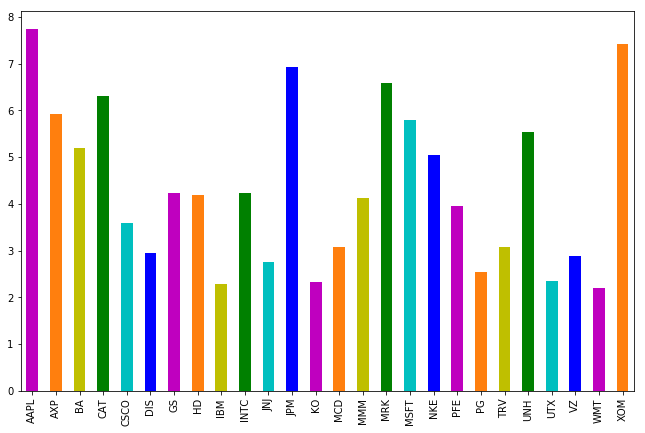

In [39]:
pedf.std().plot.bar(color=COLORS,figsize=FIGSIZE)

<div style="border:2px;border-style:solid;border-color:black;background-color:white;font-style:italic;line-height:150%;">
    <h1 style="text-indent:3%;">How do we decide if the P/E is low?
    <h1 style="text-indent:7%;">P/E that is <u>below</u> <u>average</u> for the market place.</h1>
    <h2 style="text-indent:7%;">Measure this by calculating the Number of Standard Deviations the P/E, for a given stock, is above or below the average P/E for all the stocks:</h2>
    <hr width=90%;>
    <h1 style="text-indent:7%;">Z-Score = (Value - Mean) / StandardDeviation<br></h1>
</div>

In [40]:
pestats = pd.DataFrame()            # construct emppty dataframe
pestats['mean'] = pedf.mean(axis=1) # set 'mean' column values
pestats['std']  = pedf.std(axis=1)  # set 'std' column values

pestats.head()                      # display the first few rows

,mean,std
Date,,
2007-01-31,18.028723,5.033794
2007-02-28,17.640954,4.987392
2007-03-30,17.060388,4.702940
2007-04-30,18.031981,4.953115
2007-05-31,18.832308,5.769437


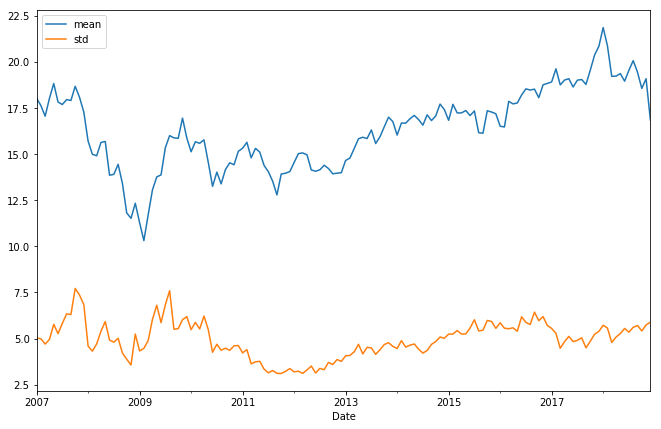

In [41]:
pestats.plot(figsize=FIGSIZE)

In [42]:
pezscore = pedf.subtract(pestats['mean'],axis='rows').divide(pestats['std'],axis='rows')
pezscore.head()

,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,2.566807,0.420473,0.800664,-1.161772,1.177298,0.473694,-1.443171,-0.504237,-0.347238,1.150122,...,1.402655,0.157392,-1.051061,1.004546,-1.869390,-0.143852,0.050891,-0.473107,-0.314658,-1.334128
2007-02-28,2.587353,0.408479,0.772778,-1.081498,1.148585,0.449944,-1.639364,-0.518097,-0.474868,0.985655,...,1.054949,0.929172,-1.107684,0.993174,-1.812080,-0.071411,0.000310,-0.488523,-0.197649,-1.342877
2007-03-30,2.604480,0.291522,0.738498,-0.933307,1.262957,0.476726,-1.564870,-0.657203,-0.405297,0.942817,...,0.605305,1.189960,-1.129419,0.971671,-1.805081,0.029282,-0.037697,-0.449461,-0.185137,-1.268311
2007-04-30,2.715588,0.362362,0.695748,-0.868985,0.896127,0.318753,-1.568423,-0.468045,-0.322924,1.236660,...,0.677093,0.996549,-1.155834,0.805961,-1.832177,-0.162460,-0.120244,-0.602223,-0.349816,-1.283734
2007-05-31,3.382426,0.416504,0.762395,-0.689479,0.656822,0.179618,-1.399011,-0.468626,-0.293618,1.053446,...,0.532945,0.654707,-1.047989,0.508090,-1.709666,-0.181960,-0.087982,-0.290220,-0.457897,-1.144203


In [43]:
maxmin = pd.DataFrame([pezscore.max(),pezscore.min()],index=['Max','Min'])
maxmin

,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Max,3.867503,2.992677,1.541382,3.039207,1.491222,1.248566,2.147197,2.393517,0.390293,1.487701,...,2.025279,2.750551,1.725851,1.908680,1.151405,1.088685,0.835491,1.670791,1.323102,3.558878
Min,-1.316667,-1.326248,-1.565684,-1.604811,-1.073875,-0.719054,-2.032113,-0.814053,-1.921435,-1.867904,...,-1.362131,-0.289964,-1.445815,-0.261343,-1.892566,-1.467931,-0.561093,-1.461241,-0.860428,-1.475769


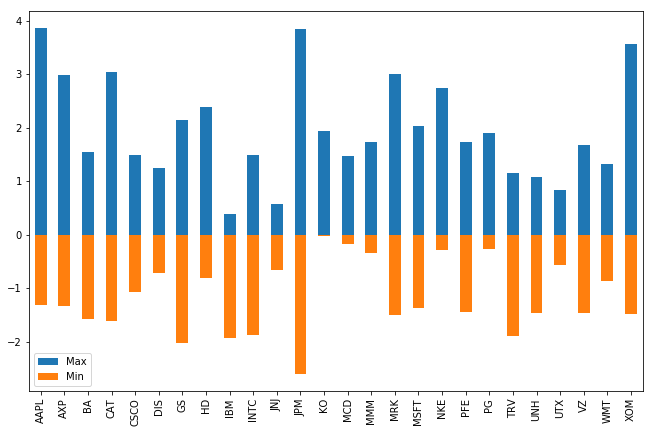

In [44]:
maxmin.T.plot.bar(stacked=True,figsize=FIGSIZE)

<h2 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;">
    <font size="5">
    <br>&nbsp;&nbsp;&nbsp;&nbsp;Annualized Return calculation:<br>
</h2>
<h2 style="border:3px;border-style:solid;border-color:black;background-color:lightgreen;line-height:125%;">
    <font size="5">
    <br>
    \begin{align} 
    Return & = (FinalValue\: /\: StartingValue) - 1.0 \\ \\
    Annualized Return & = (FinalValue\: /\: StartingValue)^{(365\:/\:Days)}  - 1.0 \\
    \end{align}
    </font>
    <br>
</h2>
<h2 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;">
    \begin{align} 
    \\
    StartingValue & = Starting\:  Price \\
    FinalValue & = Final\:  Price\:  +\:  Dividends\:  Earned \\
    Days & = Number\:  of\:  Days\:  between\:  StartingValue\:  and\:  FinalValue \\
    \\
    \end{align}
</h2>

In [45]:
pxdf = pd.read_csv("data/indu_px_last_1989-2018.csv",header=None)
pxdf.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Date,AAPL UW Equity,AXP UN Equity,BA UN Equity,CAT UN Equity,CSCO UW Equity,CVX UN Equity,DIS UN Equity,DWDP UN Equity,GS UN Equity,...,PG UN Equity,TRV UN Equity,UNH UN Equity,UTX UN Equity,V UN Equity,VZ UN Equity,WBA UW Equity,WMT UN Equity,XOM UN Equity,INDU Index
1,1/31/1989,1.3482,7.8274,14.083,7.7344,NaN,12.5625,6.1669,14.5105,NaN,...,5.7578,12.063,NaN,5.516,NaN,16.8065,NaN,4.2031,11.5938,2342.32
2,2/28/1989,1.2946,7.5398,13.75,7.3438,NaN,12.125,6.0847,13.9316,NaN,...,5.5391,11.875,NaN,5.469,NaN,16.3863,NaN,3.9844,10.9688,2258.39
3,3/31/1989,1.2723,8.0829,15.167,7.1406,NaN,13.1875,6.4547,13.7075,NaN,...,5.7813,12.125,NaN,5.688,NaN,17.0866,NaN,4.0469,10.9688,2293.62
4,4/28/1989,1.3929,8.3385,16.833,7.5625,NaN,13.5938,6.9994,14.1557,NaN,...,5.9844,12.625,NaN,6.5,NaN,18.6832,NaN,4.4844,10.8125,2418.8


In [46]:
pxdf = pd.read_csv("data/indu_px_last_1989-2018.csv",
                   header=0,index_col=0,parse_dates=True)
pxdf.columns = [x.split()[0] for x in pxdf.columns]
pxdf.head(3)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,INDU
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-31,1.3482,7.8274,14.083,7.7344,NaN,12.5625,6.1669,14.5105,NaN,1.025,...,5.7578,12.063,NaN,5.516,NaN,16.8065,NaN,4.2031,11.5938,2342.32
1989-02-28,1.2946,7.5398,13.750,7.3438,NaN,12.1250,6.0847,13.9316,NaN,1.144,...,5.5391,11.875,NaN,5.469,NaN,16.3863,NaN,3.9844,10.9688,2258.39
1989-03-31,1.2723,8.0829,15.167,7.1406,NaN,13.1875,6.4547,13.7075,NaN,1.193,...,5.7813,12.125,NaN,5.688,NaN,17.0866,NaN,4.0469,10.9688,2293.62


<h1 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;text-indent:5%;">
    <br><font size="5.6">&nbsp;&nbsp;&nbsp;&nbsp;Data Frame Shape:</font>
    <br><font size="5">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&bull;&nbsp;&nbsp;Want prices dataframe (pxdf) to be same shape as P/E dataframe (pedf).</font>
    <br>
</h1>

In [47]:
start_date = str(pedf.index[ 0]).split()[0]
end_date   = str(pedf.index[-1]).split()[0]
print('start_date =',start_date,'\nend_date   =',end_date)

start_date = 2007-01-31 
end_date   = 2018-12-31


In [48]:
print("\nBEFORE slicing/filtering, pxdf.shape =",pxdf.shape)

pxdf = pxdf.loc[start_date:end_date,pedf.columns]

print("\nAFTER slicing/filtering, pxdf.shape =",pxdf.shape)


BEFORE slicing/filtering, pxdf.shape = (360, 31)

AFTER slicing/filtering, pxdf.shape = (144, 26)


<h2 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;">
    <font size="4.5">
    <br>&nbsp;&nbsp;&nbsp;&nbsp;Have prices; Now need Dividends to Calculate Returns.
    <br>&nbsp;&nbsp;&nbsp;&nbsp;How Will Dividends be Used?<br>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Final Value = Final Price + Dividends.
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Calculate various returns (1mo, 3mo, 6mo, 1yr, 2yr)
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Need Dividend amounts<font size="5"> specifically between Start Date and End Date.</font><br>

</h2>

In [49]:
dvdf = pd.read_csv("data/indu_dvd_hist_cash.csv",header=None) 
dvdf.head(8)

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,NaN,Dividend History - Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dividend History - Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dividend History - Cash
1,NaN,DVD_HIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DVD_HIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DVD_HIST
2,AAPL UW Equity,1/29/2019,2/8/2019,2/11/2019,2/14/2019,0.73,Quarter,Regular Cash,NaN,AXP UN Equity,...,1/30/2019,2/8/2019,2/11/2019,3/11/2019,0.82,Quarter,Regular Cash,NaN,INDU Index,#N/A Field Not Applicable
3,NaN,11/1/2018,11/8/2018,11/12/2018,11/15/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,10/31/2018,11/9/2018,11/13/2018,12/10/2018,0.82,Quarter,Regular Cash,NaN,NaN,NaN
4,NaN,7/31/2018,8/10/2018,8/13/2018,8/16/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,7/25/2018,8/10/2018,8/13/2018,9/10/2018,0.82,Quarter,Regular Cash,NaN,NaN,NaN
5,NaN,5/1/2018,5/11/2018,5/14/2018,5/17/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,4/25/2018,5/11/2018,5/14/2018,6/11/2018,0.82,Quarter,Regular Cash,NaN,NaN,NaN
6,NaN,2/1/2018,2/9/2018,2/12/2018,2/15/2018,0.63,Quarter,Regular Cash,NaN,NaN,...,1/31/2018,2/9/2018,2/12/2018,3/9/2018,0.77,Quarter,Regular Cash,NaN,NaN,NaN
7,NaN,11/2/2017,11/10/2017,11/13/2017,11/16/2017,0.63,Quarter,Regular Cash,NaN,NaN,...,10/25/2017,11/10/2017,11/13/2017,12/11/2017,0.77,Quarter,Regular Cash,NaN,NaN,NaN


In [50]:
dvdf = pd.read_csv("data/indu_dvd_hist_cash.csv",
                   header=None,skiprows=2,
                   usecols=range(270))
dvdf.head(8)

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,AAPL UW Equity,1/29/2019,2/8/2019,2/11/2019,2/14/2019,0.73,Quarter,Regular Cash,NaN,AXP UN Equity,...,NaN,XOM UN Equity,1/30/2019,2/8/2019,2/11/2019,3/11/2019,0.82,Quarter,Regular Cash,NaN
1,NaN,11/1/2018,11/8/2018,11/12/2018,11/15/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,10/31/2018,11/9/2018,11/13/2018,12/10/2018,0.82,Quarter,Regular Cash,NaN
2,NaN,7/31/2018,8/10/2018,8/13/2018,8/16/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,7/25/2018,8/10/2018,8/13/2018,9/10/2018,0.82,Quarter,Regular Cash,NaN
3,NaN,5/1/2018,5/11/2018,5/14/2018,5/17/2018,0.73,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,4/25/2018,5/11/2018,5/14/2018,6/11/2018,0.82,Quarter,Regular Cash,NaN
4,NaN,2/1/2018,2/9/2018,2/12/2018,2/15/2018,0.63,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,1/31/2018,2/9/2018,2/12/2018,3/9/2018,0.77,Quarter,Regular Cash,NaN
5,NaN,11/2/2017,11/10/2017,11/13/2017,11/16/2017,0.63,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,10/25/2017,11/10/2017,11/13/2017,12/11/2017,0.77,Quarter,Regular Cash,NaN
6,NaN,8/1/2017,8/10/2017,8/14/2017,8/17/2017,0.63,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,7/26/2017,8/10/2017,8/14/2017,9/11/2017,0.77,Quarter,Regular Cash,NaN
7,NaN,5/2/2017,5/11/2017,5/15/2017,5/18/2017,0.63,Quarter,Regular Cash,NaN,NaN,...,NaN,NaN,4/26/2017,5/10/2017,5/12/2017,6/9/2017,0.77,Quarter,Regular Cash,NaN


In [51]:
# There are 9 columns per stock in the dividends dataframe.
# Loop through the dividends data frame, 9 columns at a time, stripping out
# the data needed:  Place into a dictionary, where the Key is the ticker symbol 
# and value is the dividend stream (dates and amounts for dividends payments)''')
dvs = {}
for col in range(0,270,9):
    
    ticker = dvdf.iloc[0,col].split()[0]
    
    index  = pd.DatetimeIndex( dvdf.iloc[:,col+2].values[::-1] )
    
    dvs[ticker] = pd.Series( dvdf.iloc[:,col+5].values[::-1],
                             index=index, name='Dividend' )
    
    dvs[ticker].index.name = 'ExDate'   # 'Ex-Dividend date - after this date the buyer is not entitled to the dividend.'
    dvs[ticker].dropna(inplace=True)    # Remove 'N/A's from the dividend stream.

In [52]:
# Poke around the dividend dict data;  make sure it looks reasonable:
dvs['AAPL'].head()
dvs['AAPL'].tail()
dvs.keys()
len(dvs.keys())

ExDate
1987-05-11    0.002143
1987-08-10    0.002143
1987-11-17    0.002857
1988-02-12    0.002857
1988-05-16    0.002857
Name: Dividend, dtype: float64

ExDate
2018-02-09    0.63
2018-05-11    0.73
2018-08-10    0.73
2018-11-08    0.73
2019-02-08    0.73
Name: Dividend, dtype: float64

dict_keys(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM'])

30

In [53]:
print('==================================================')
print(' TEST: Can we easily sum up the dividends paid ')
print(' for a given stock and a given period of time? ')
print('==================================================\n')

dv_paid = dvs['UTX']['06/01/2007':'05/13/2008']   # Dividend stream between two dates for a specific stock.
print(dv_paid)

print('\n Total dividends paid = ',dv_paid.sum())

 TEST: Can we easily sum up the dividends paid 
 for a given stock and a given period of time? 

ExDate
2007-08-15    0.32
2007-11-14    0.32
2008-02-13    0.32
Name: Dividend, dtype: float64

 Total dividends paid =  0.96


<h2 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;">
    <br><font size="6">&nbsp;&nbsp;&nbsp;&nbsp;Returns Calculation:</font>
    <br><br><font size="5">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For each stock, given series of prices, and dividends,
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate returns for 1mo, 3mo, 6mo, 1yr, 2yr,
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>for each date</i> in the series.</font>
    <br>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&bull;&nbsp;&nbsp;Use Pandas DataFrame.apply() method
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;to apply a returns calcuation function to each column (stock) in the dataframe.<br>

</h2>

In [54]:
import numpy as np # import numpy as np was done above
_NaN_ = np.nan  # using a global variable repeatedly is twice as fast as using np.nan repeatedly

def calc_returns(prices,num_months,annual=True,dvds=None):
    #   prices is a Series.  
    #   prices is one column at a time from the prices dataframe
    #   on which apply(calc_returns, axis=0, ... ) was called.
    
    # debugging print statements to confirm this is being called as expected:
    # print("type(prices)=",type(prices))
    # print("prices.index=",prices.index)
    # print("prices[0:2]=",prices[0:2])
    # print("type(prices)=",type(prices))
    # print("calc_returns called with prices.name=\"",prices.name,"\" num_months=",num_months,"  annual=",annual)
    # print("calc_returns: The type of variable dvds is ",type(dvds))
    
    if dvds is not None:
        if not isinstance(dvds, dict):
            raise TypeError("calc_returns() got NON-DICT for Dividends!")
            return None
            
    if not isinstance(num_months, int):
        raise TypeError("calc_returns() got NON-INTEGER for num_months!")
        return None
    
    if num_months < 1 or num_months > len(prices):
        raise IndexError("calc_returns got num_months OUT OF RANGE( 1,",len(prices),") !")
        return None

    # construct empty returns series for this stock:
    returns = pd.Series(name=prices.name)
    
    size    = len(prices.index) 
    limit   = size - num_months
    once    = False
    for jj in range(0,limit):
        d1  = prices.index[jj]
        d2  = prices.index[jj+num_months]
        #print('d1=',d1,' d2=',d2)
        if (annual):
            num_days = float((d2 - d1).days)
            # debugging num_days:
            # if not once:
            #     print("num_days=",num_days)
            #     once = True
            p1  = prices.loc[d1]   # Starting Value
            p2  = prices.loc[d2]   # Ending Price
            if isinstance(dvds, dict):
                ds  = dvds[prices.name][d1:d2].sum()
                p2 += ds           # Ending Value
                #print(">>> ", prices.name," dividends from ",d1," to ",d2," sum = ", ds)
            ret = ( ((p2/p1)**(365.0/num_days)) - 1.0 ) * 100.0
        else:
            ret = ((p2/p1) - 1.0) * 100.0

        # print("d1=",d1,"  d2=",d2,"  p1=",prices.loc[d1],"  p2=",prices.loc[d2],"  ret=",ret)
        returns[d1] = ret

    for jj in range(limit,size):
        d1  = prices.index[jj]
        returns[d1] = _NaN_
        
    # print("\n ===> returns=",returns)
    return returns

# Example of 3 month returns:


In [55]:
# apply to axis=0 (vertical axis) means apply the 
# function once for each column in the dataframe.
ret3mo = pxdf.apply(calc_returns, axis=0, args=(3,True,dvs))  # this takes several seconds to run

In [56]:
#ret3mo.head()
ret3mo.loc['2011-01-31':'2011-03-31','AAPL':'CSCO']

,AAPL,AXP,BA,CAT,CSCO
2011-01-31,11.349364,69.423911,81.327550,108.787687,-53.111461
2011-02-28,-5.908027,98.359555,40.471267,13.379912,-31.690856
2011-03-31,-13.918373,76.253303,2.298226,-15.090694,-31.434430


<h2 style="border:3px;border-style:solid;border-color:black;background-color:powderblue;line-height:125%;">
    <font size="4">
    <br>&nbsp;&nbsp;&nbsp;&nbsp;Determine relationship between PE ratio and Returns:<br>
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Calculate various returns (1mo, 3mo, 6mo, 1yr, 2yr) for each stock and each date.
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Determine z-score for each return value.
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#x25cf;&nbsp;Compare with z-score for Price/Earnings ratio.<br>
    <br>

</h2>

In [57]:
from collections import OrderedDict
periods = OrderedDict([ (1, '1mo'), (3, '3mo'),  (6, '6mo'), (12, '1yr'), (24, '2yr') ])
periods

OrderedDict([(1, '1mo'), (3, '3mo'), (6, '6mo'), (12, '1yr'), (24, '2yr')])

In [58]:
print("=======================================================================")
print(" This cell takes about 30 to 60 seconds to run (depending on your CPU).")
print("=======================================================================")
import time
stime = time.perf_counter()

returns = {}
rstats  = {}
rzscore = {}
for num_months in periods.keys():
    print("\nCalculate ",periods[num_months]," returns ...")
    p = periods[num_months]
    returns[p] = pxdf.apply(calc_returns,axis=0,args=(num_months,True,dvs))
    rstats[p]  = pd.DataFrame()
    rstats[p]['mean'] = returns[p].mean(axis=1)
    rstats[p]['std']  = returns[p].std(axis=1)
    rzscore[p] = returns[p].subtract(rstats[p]['mean'],axis='rows').divide(rstats[p]['std'],axis='rows')
    print(rzscore[p].iloc[0:2,0:6])
    #print(returns[periods[num_months]].head(36).tail(2))
    
print('\nelapsed time=',time.strftime('%M:%S',time.gmtime(time.perf_counter()-stime)))

 This cell takes about 30 to 60 seconds to run (depending on your CPU).

Calculate  1mo  returns ...
                AAPL       AXP        BA       CAT      CSCO       DIS
2007-01-31  0.156667 -0.166677 -0.120457  0.862047 -0.204102 -0.245937
2007-02-28  3.717217 -0.535604  0.135840  0.839466 -0.689289 -0.232538

Calculate  3mo  returns ...
                AAPL       AXP        BA       CAT      CSCO       DIS
2007-01-31  2.228217 -0.062208 -0.099719  1.663279 -0.654393 -0.809593
2007-02-28  4.064394  0.151037  0.258542  0.966432 -0.717112 -0.740157

Calculate  6mo  returns ...
                AAPL       AXP        BA       CAT      CSCO       DIS
2007-01-31  3.645334 -0.384662  0.605810  1.165114  0.096772 -0.735138
2007-02-28  3.700257 -0.455268 -0.007805  0.412598  0.688987 -0.677496

Calculate  1yr  returns ...
                AAPL       AXP        BA       CAT      CSCO       DIS
2007-01-31  3.214935 -1.213446 -0.682488  0.469152 -0.823736 -1.123709
2007-02-28  2.522577 -1.622328 

---
# Plot the 1-year Return z-score, and the P/E z-score, for one example stock.
# Also plot a line at zero, _since zero z-score represents the market average_, this will help us to see clearly where the Return z-score and the P/E z-score indicate that this stock's Return or P/E is above or below the market average
---

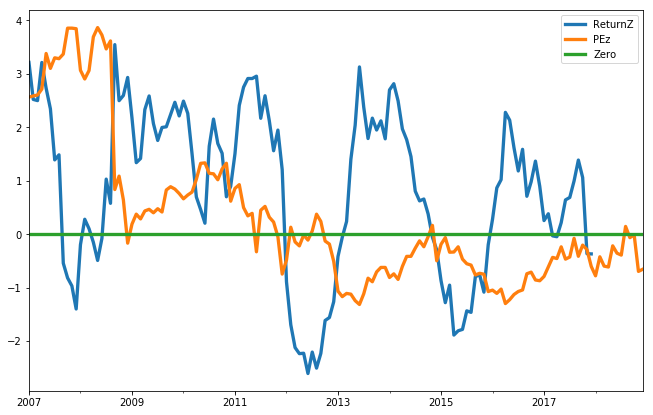

In [59]:
rtz = rzscore['1yr']['AAPL']
pez = pezscore['AAPL']
mi1 = pd.Series([0]*len(pez),index=pez.index,name='Zero') 
pd.concat([rtz,pez,mi1],axis=1,keys=['ReturnZ','PEz','Zero']).plot(figsize=FIGSIZE,linewidth=3.3)

---

# "A Picture is Worth a Thousand Words" (above)<br><br>&nbsp;&nbsp;*but*<br><br> "There is Strength In Numbers!" 
## ... so let's calculate the correlations for the full data set and see what we get:

---

In [60]:
def calcorrs(beg,end):
    ix = [] # data to form the multi-index
    co = [] # correlation data
    for col in pezscore.columns:
        for key in rzscore.keys():
            corr = pezscore[col].iloc[beg:end].corr(rzscore[key][col].iloc[beg:end])
            ix.append((col,key)) # use tupples
            co.append(corr)
            #print(" ",col," ",key," correlation: ", corr)
    return pd.Series(co, 
                     index=pd.MultiIndex.from_tuples(ix, names=['Ticker','Period']),
                     name='Corr'+str(end-beg))

---
## calcorrs() returns a Multi-Index Series:
---

In [61]:
corrs = calcorrs(0,144)

In [62]:
type(corrs)
corrs.head(16)

pandas.core.series.Series

Ticker  Period
AAPL    1mo       0.130581
        3mo       0.113218
        6mo       0.059862
        1yr       0.035392
        2yr       0.371123
AXP     1mo       0.000252
        3mo      -0.043654
        6mo      -0.041084
        1yr      -0.138371
        2yr      -0.175158
BA      1mo      -0.074695
        3mo      -0.076470
        6mo      -0.175980
        1yr      -0.261332
        2yr      -0.254709
CAT     1mo       0.167137
Name: Corr144, dtype: float64

---
## A Series (instead of a DataFrame) allows us to "describe" _all_ of the correlations, for _all_ stocks and _all_ return periods, all together:
---

In [63]:
len(corrs)
corrs.describe()

130

count    130.000000
mean      -0.097865
std        0.221582
min       -0.756744
25%       -0.240861
50%       -0.090167
75%        0.035328
max        0.433013
Name: Corr144, dtype: float64

## Above: The mean correlation for all stocks (correlated over the entire all 144 months for which we have data) *is negative, but only slightly.*
---

In [64]:
corrs[ corrs > 0.25 ]  # Which correlations are significantly positive?

Ticker  Period
AAPL    2yr       0.371123
CAT     3mo       0.342741
        6mo       0.433013
        1yr       0.359322
IBM     6mo       0.306893
        1yr       0.393992
        2yr       0.256328
Name: Corr144, dtype: float64

In [65]:
corrs[ corrs < -0.5 ]  # Which correlations are significantly negative?

Ticker  Period
CSCO    1yr      -0.661339
        2yr      -0.756744
KO      2yr      -0.591505
MCD     2yr      -0.534977
UTX     2yr      -0.612207
Name: Corr144, dtype: float64

## Above: we see that those stocks that show significant negative correlation (between P/E and Return) do so with the *longer* period Returns.
---

---
## Side note:
## If we want, we can use Series.unstack() to view a Multi-Index Series as a DataFrame:  

---

In [66]:
corrs.head(12)

Ticker  Period
AAPL    1mo       0.130581
        3mo       0.113218
        6mo       0.059862
        1yr       0.035392
        2yr       0.371123
AXP     1mo       0.000252
        3mo      -0.043654
        6mo      -0.041084
        1yr      -0.138371
        2yr      -0.175158
BA      1mo      -0.074695
        3mo      -0.076470
Name: Corr144, dtype: float64

In [67]:
corrs.unstack().head()

Period,1mo,1yr,2yr,3mo,6mo
Ticker,,,,,
AAPL,0.130581,0.035392,0.371123,0.113218,0.059862
AXP,0.000252,-0.138371,-0.175158,-0.043654,-0.041084
BA,-0.074695,-0.261332,-0.254709,-0.076470,-0.175980
CAT,0.167137,0.359322,-0.027792,0.342741,0.433013
CSCO,-0.184393,-0.661339,-0.756744,-0.332008,-0.450473


---

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TEST PLAN

## 1. Buy all stocks

## 2. Buy stocks with Low-P/E<br>&nbsp;&nbsp;&nbsp;&nbsp;<font size=4px>(original hypothesis)</font>

## 3. Buy stocks with Low-P/E *that also* <br>&nbsp;&nbsp;&nbsp;&nbsp;*show a history of negative correlation between P/E and Return* <br>&nbsp;&nbsp;&nbsp;&nbsp;<font size=4px>(new hypothesis)</font>

---

---

### We saw that most of the negative correlations between P/E and Return were for the 2-Year Returns,<br>therefore we implement the test plan with 3 specific Trading Strategies:
<ol><b>
    <li>Buy All stocks and hold for 2 years.</li>
    <li>Buy LowPE stocks and hold for 2 years.</li>
    <li>Buy LowPE stocks with historical negative correlation between P/E and Return, and hold for 2 years.</li>
    </b>
</ol>
  
### The algorithm for testing these 3 trading strategies:
#### Let's first review what data we have, then we will describe the algorithm.
  - DataFrame of P/E ratios for 144 months (rows) across 26 stocks (columns)
  - DataFrame of P/E z-scores for 144 months across 26 stocks.  A stock's P/E z-score on a given date is the number of standard deviations the stock's P/E on that date is *above or below the **average P/E on that date** for all 26 stocks.*
  - Dictionary of DataFrames of Returns for 1mo, 3mo, 6mo, 1yr and 2yr Returns.  The dictionary key is the return period, and the value is the DataFrame of Returns:  Each of these 5 DataFrames contains 144 months of Returns across 26 stocks.  The Return value attributed to each date (row) is the Return for *purchasing the stock on that date,* and holding the stock for the period of time (1,3,6,12, or 24 months) specified by the dictionary key.
  - Dictionary of DataFrames of "Return z-scores" for 1mo, 3mo, 6mo, 1yr and 2yr Returns.  Each of these 5 DataFrames contains 144 months of Return z-scores across the 26 stocks.  A stock's "Return z-score" on a given date is the number of standard deviations the stock's Return on that date is *above or below the average Return on that date for all 26 stocks.*

---  

### NOTE: Our new hypothesis is:
### "Choosing stocks that have BOTH LowPE <u>and</u> a history of negative correlation between P/E z-score and Returns z-score, should give even better returns than choosing stocks with just lowPE alone."
### As noted above, when formulating this new hypothesis, we noticed that the more negative correlations tended to be with the longer returns, THEREFORE we will at this point concern ourselves ONLY WITH 2 YEAR RETURNS.

- Therefore we can reduce our *relevant* data set as follows:
  - We are concerned only with 2 year returns
  - We measure correlations only between z-scores of P/E and z-scores of Returns (*not* directly between P/E and Returns)
  - We do not need explicit P/E values, *only* the P/E z-scores.
  - However we do need explicit Return values to measure the performance of each trading strategy.

---
### Thus our *relevant* data set reduces to:
  - **Dataframe of P/E z-Scores ( *pezscore* ) for 144 months by 26 stocks.**
  - **Dataframe of 2-year Returns z-scores ( *rzscore['2yr']* ) for 144 months by 26 stocks.**
  - **Dataframe of 2-year Returns ( *returns['2yr']* ) for 144 months by 26 stocks.**

---
### The basic algorithm to test these 3 trading strategies is this:
1. We are going to test the each of the 3 trading strategies on various dates, thus various market conditions.
1. We will test 36 dates, once per month, from January 2014 through December 2016.<br><br>

1. The algorithm for the first 2 trading strategies is simple:<br><br>
  1. For the first trading strategy, "Buy all 26 Stocks", on any one of the 36 dates mentioned above, the Return for that strategy on the given date, is the average Return of all 26 stocks on that date.  Thus, if `returns` is the Returns dataframe, then the strategy's Return is 
  
      `returns[<date>].mean()`<br><br>
  
  1. For the second trading strategy, "Buy low P/E Stocks", on any one of the 36 dates mentioned above, the Return for that strategy on the given date, is the average Return on that date of *only those stocks with a Low P/E.*  Thus, if `returns` is the Returns dataframe, and `pezscore` is the P/E z-score dataframe, then the strategy's Return is
  
      `returns[<date>][ pezscore[<date>] < LIMIT ].mean()`
      
     where `LIMIT` is an arbitrary z-score that we define as being a Low P/E.  In the code below, and the results presented in the video, we have chosen `-0.65` (that is, 0.65 standard deviations below the mean).<br><br>
  
1. The third trading strategy is trickier<br><br> 
  1. Getting Strategy Returns for the third strategy ("Buy stocks with *both* low P/E and Negative Correlation between P/E and Return") is partially similar to the second strategy in that, before taking the `mean()` Return, we want to filter down from 26 stocks.<br><br>First, as with the second strategy, we include only those stocks with a Low PE (`pezscore[<date>] < LIMIT`),<br> **then** we filter that list down further to *include only those stocks that **also** show a history of a negative correlation between the P/E z-score and the Returns z-score*.<br><br>
  1. This latter filtering (negative correlation between the PE z-score and Returns z-score) is the tricky part: Since we are concerned with 2-year Returns, and since the Return on a given date represents purchasing the stock on that date and holding for two more years, then the time period we choose to measure the correlation must END no later than two years and one day *before* the date on which we are filtering and making a trade decision.  (We will actually do two years and one month, because we have monthly data).  *To put this in terms of a practical example*:<br><br>
    1. Let's say we are deciding which stocks to buy on **31-Jan-2014** (the first of our 36 dates).
    1. We want stocks have a negative correlation between P/E z-score, `pezscore`, and Returns z-score, `rzscore`.<br><br>
    1. We need a period of time over which to measure the correlation.  Let's say we choose a one-year correlation period, say the year leading up to the date on which we are trying to make a trade decision.  Thus the correlation would be:
    
        `correlation = pezscore['2013-01-31':'2014-01-31'].corr( rzscore['2013-01-31':'2014-01-31'] )`
        
        **The problem with this** is that *the Returns in `rzscore` are 2-year Returns, calculated as if the stock was purchased on the date specified, held for 2-years, and then sold.*  Thus to calculate Return on 2013-01-31, we need the price on 2013-01-31 (buy date) **and** the price on **2015-01-31** (the 2-year sell date).  Thus effectively we would be using a price in the future (2015-01-31) of the date on which we are trying to make our trade decision (2014-01-31).<br><br>
    1. Thus, if we want to calculate a correlation (between pezscore and rzscore) to make a trade decision on 2014-01-31, then we must use a time period that does not include any prices from 2014-01-31 or later, thus:
    
        `correlation = pezscore['2010-12-31':'2011-12-31'].corr( rzscore['2010-12-31':'2011-12-31'] )`
        
        The reason we back up an entire month (to December) is because we have monthly data; thus the only way to not include 2014-01-31 is to use returns that stop using prices at 2013-12-31 (and for two-year returns that would be the return for 2011-12-31).
<br><br>
  1.  Now that we know that the correlation period must end at least 2 years before the trade date, we need to decide:
    1. how long of a correlation period to use, and
    1. whether the correlation period should be fixed for all 36 test trade dates, or should slide along always being two years behind each trade date.<br><br>
  1. Regarding the length of the correlation period, intuition might say that if a stock has a negative correlation for a longer period of time, then it is more likely to also show a negative correlation in the future (when we are making our trade).  *However, the whole point of using Pandas is not to rely on intuition, but rather to run the numbers and see what happens!*  Therefore we will run the test with various correlation periods (1yr, 2yr, 3yr, etc) and see if some correlation periods give better results than others.<br><br>
  1. Regarding whether to choose:
    1. a fixed period, or fixed end date, for all of the correlation calculations, or 
    1. sliding correlation periods so that for each trade date the correlation period ends slightly greater than 2 years before the the trade date ...
    
    Consider the following:  Markets definitely change over time.  A rule or trend that holds for one time period may not hold for later time periods.  Therefore, even though we must use corrlation periods *at least* two years before the trade date, there may be an advantage to using time periods that are as close to the trade date as possible.  Therefore we will use sliding correlation periods that always end just one data point (one month) more that two years before the trade date.]
<br><br>
1. So here is how we are going to implement the above tests:<br><br>
  1. Slice out the 36 dates we want from the Returns dataframe, so we have a smaller 36x26 dataframe (instead of 144x26).
  1. Use `DataFrame.apply(axis=1)` method to apply a function to each row (date) in the Returns dataframe.
  1. `.apply(axis=1)` will repeatedly call our function, once for each row (date), passing into our function a series that corresponds to the row: the 26 stocks tickers will be the index for the series, the series name will be the date corresponding to that row, and the series values are the 26 stocks' Returns for that date.  
  1. In every case the function called by `apply()` will be taking the `.mean()` of the Returns for the set of stocks that we buy, which will be our overall Return for investing in that set of stocks (for two years beginning on that date).  *The difference between the three trading strategies is merely the set of stocks for which we take the `.mean()`
    1. The first strategy is simple:  The function needs no arguments.  It simply takes the `.mean()` for the entire row.
    1. The second strategy requires us to pass the P/E z-score dataframe as an argument.  We use that to filter on the stocks that have Low P/E and then take the `.mean()`
    1. The third strategy requires as arguments both the P/E z-scores dataframe <u>and</u> the Returns z-scores dataframe:  
      - We use the P/E z-scores to filter on the Low P/E stocks, and
      - We use <u>both</u> z-score dataframes (pezscore and rzscore) to calculate the appropriate correlations, and use the correlations to filter on the stocks that have a negative correlation between P/E z-score and Returns z-score.

In [68]:
print('---------------------------------')
print('Here are the relavant dataframes:')
print('---------------------------------')
pez  = pezscore
rzs  = rzscore['2yr']
rets = returns['2yr']

pez.head(3)
rzs.head(3)
rets.head(3)

---------------------------------
Here are the relavant dataframes:
---------------------------------


,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,2.566807,0.420473,0.800664,-1.161772,1.177298,0.473694,-1.443171,-0.504237,-0.347238,1.150122,...,1.402655,0.157392,-1.051061,1.004546,-1.869390,-0.143852,0.050891,-0.473107,-0.314658,-1.334128
2007-02-28,2.587353,0.408479,0.772778,-1.081498,1.148585,0.449944,-1.639364,-0.518097,-0.474868,0.985655,...,1.054949,0.929172,-1.107684,0.993174,-1.812080,-0.071411,0.000310,-0.488523,-0.197649,-1.342877
2007-03-30,2.604480,0.291522,0.738498,-0.933307,1.262957,0.476726,-1.564870,-0.657203,-0.405297,0.942817,...,0.605305,1.189960,-1.129419,0.971671,-1.805081,0.029282,-0.037697,-0.449461,-0.185137,-1.268311


,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
2007-01-31,1.191195,-2.114531,-1.026838,-0.916784,-0.751052,-0.506773,-1.628058,-0.705773,0.864658,-0.299420,...,-0.660925,0.836333,-0.362300,0.598943,0.288326,-0.844820,0.035391,0.556831,1.104908,1.260426
2007-02-28,1.313733,-2.238875,-1.299617,-1.130246,-0.508759,-0.709198,-0.945623,-0.459578,1.225769,0.037325,...,-0.321709,0.543867,-0.377243,0.463607,0.285349,-1.393770,-0.086832,0.674459,1.319458,1.098286
2007-03-30,1.375058,-2.326286,-1.353768,-1.216716,-0.333272,-0.774659,-0.902939,-0.196000,1.164891,0.383428,...,-0.191255,0.656849,-0.416769,0.207057,0.347602,-1.555243,-0.149430,0.591483,1.433083,0.748189


,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
2007-01-31,2.534211,-44.273327,-28.872100,-27.313798,-24.967100,-21.508235,-37.385098,-24.325971,-2.089402,-18.572200,...,-23.690945,-2.490470,-19.462552,-5.851810,-10.249992,-26.294823,-13.831432,-6.448086,1.312419,3.514490
2007-02-28,2.740211,-51.440660,-37.116024,-34.532939,-25.054633,-28.111538,-31.717256,-24.304571,1.398669,-16.726302,...,-22.201940,-9.001019,-23.048883,-10.225076,-12.943684,-38.551956,-18.619821,-7.009360,2.827520,-0.545573
2007-03-30,6.349848,-48.369905,-33.992436,-31.966290,-18.905675,-25.431027,-27.327490,-16.876278,3.242790,-8.310156,...,-16.806135,-4.267969,-20.140067,-10.917579,-8.839800,-36.970997,-16.187793,-5.234328,7.207678,-2.917621


In [69]:
print('slice rets, to include just our test dates:')
rets = rets.loc['2014-01-31':'2016-12-31']
rets.shape
rets.head(1)
rets.tail(1)

slice rets, to include just our test dates:


(36, 26)

,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
2014-01-31,19.024056,-19.14999,0.570761,-14.975168,7.67084,16.425426,0.68199,30.155744,-12.931965,15.798559,...,23.35706,31.706794,3.644771,6.525605,17.211664,28.095757,-9.902165,6.414945,-3.026397,-4.867147


,AAPL,AXP,BA,CAT,CSCO,DIS,GS,HD,IBM,INTC,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
2016-12-30,18.611588,15.036131,46.619352,19.927184,22.992245,4.116718,-14.95721,15.681407,-12.934272,16.453154,...,29.86892,22.002736,19.352174,7.674002,1.292731,26.297727,1.094025,6.815337,18.600387,-9.149096


In [70]:
from dateutil.relativedelta import relativedelta as rdelta

def trading_strategy(returns,strategy,pez=None,rzs=None,corrlen=None):
    valid_strategies = ['buyall','lowpe','lpe_negcorr']
    if strategy not in valid_strategies:
        raise ValueError('strategy must be one of '+str(valid_strategies))
    
    if strategy == 'buyall':
        return returns.mean()
    
    date  = returns.name
    lowpe = pez.loc[date] < -0.65  # Low P/E arbitrarily defined as z-score < -0.65

    if strategy == 'lowpe':
        return returns[lowpe].mean()

    if strategy != 'lpe_negcorr':
        raise ValueError('Bad value for "strategy", must be one of '+str(valid_strategies))
        
    # Determine correlation date range
    allowed_corrlen = [12,24,36,48,60]
    if corrlen not in allowed_corrlen:
        raise ValueError('corrlen must be one of '+str(allowed_corrlen))

    # In the calculation of the correlation date range, below, the
    # extra 3 days is to ensure we include, in our slice, those cases
    # where the day of the month (24 months ago, or corrlen months ago)
    # may be earlier than the day of the month for 'date' ... this can happen
    # because, with our monthly data, the day of the month is *not* necessarily
    # the last day of the month, but rather the last *trading day* of the
    # month (which could be 2 or 3 days earlier if the month ends with a
    # weekend and/or holiday).
    
    # end date of correlation range must be 24 months before 'date' (the date 
    # of the trade decision) so that date of the 'final price' (in the Returns 
    # used in the correlation) is before 'date' ... and since we are using
    # 2-year returns, then the end date of the correlation range must be 
    # at least 24 months before 'date'.
    
    edate = date  - rdelta(months=24,days=3)         # end date for correlation.
    sdate = edate - rdelta(months=(corrlen),days=3)  # start date for correlation.
    
    tpez = pez[sdate:edate]  # slice P/E z-scores for correlation
    trzs = rzs[sdate:edate]  # slice Return z-scores for correlation
    
    # sanity check the slices:
    if tpez.index[0] != trzs.index[0] or tpez.index[-1] != trzs.index[-1]:
        sp0 = '  tpez.index[0]=' + str(tpez.index[0])
        se0 = '  trzs.index[0]=' + str(trzs.index[0])
        sp1 = ' tpez.index[-1]=' + str(tpez.index[-1])
        se1 = ' trzs.index[-1]=' + str(trzs.index[-1])
        raise RuntimeError('Slice Index Mismatch:' + sp0 + se0 + sp1 + se1)

    corr = pd.Series(name='Correlations')
    for stock in tpez.columns:
        corr[stock] = tpez[stock].corr(trzs[stock])
    
    # This would work also: negcor_list = returns.index[ corr < -0.5 ].values
    negcor_list = tpez.columns[ corr < -0.5 ].values
    lowpe_list  = tpez.columns[ lowpe ].values
    #print('negcor_list=',negcor_list)  # for testing/debugging
    #print('lowpe_list=',lowpe_list)    # for testing/debugging
    
    # set has a method to give intersection of two sets (or a set and a list) ...
    lpe_negcor = set(negcor_list).intersection(lowpe_list)
    # note: for 60 month correlations we find that, for some months, lpe_negcor 
    #       is an empty set, in which case returns[lpe_negcor].mean() will be NaN.
    #       that just means we should not invest anything those months.
    
    return returns[lpe_negcor].mean()

In [71]:
# Buy All:
rbuyall = rets.apply(trading_strategy,args=('buyall',),axis=1)
rbuyall.mean()

13.266845836012536

In [72]:
# Buy Low PE stocks:
rlowpe = rets.apply(trading_strategy,args=('lowpe',pez),axis=1)
rlowpe.mean()

14.221917046140948

In [73]:
# Buy stocks with Negative Correlation and Low PE -- using 2-year (24 month) correlation period:
rlpenc = rets.apply(trading_strategy,args=('lpe_negcorr',pez,rzs,24),axis=1)
rlpenc.mean()

15.664133356008652

In [74]:
# Buy stocks with Negative Correlation and Low PE -- 
# test for multiple correlation periods (1yr, 2yr, 3yr, etc.)
corrlengths = [12,24,36,48,60]
data  = []
for corrlen in corrlengths:
    print('.',end='')
    data.append(rets.apply(trading_strategy,args=('lpe_negcorr',pez,rzs,corrlen),axis=1))

rlpenc = pd.Series(data,index=corrlengths,name='LPE_NegCorrs')

# For each correlation period, take a look at the mean() Return for all 36 dates:
means = [ rlpenc[corrlen].mean() for corrlen in rlpenc.index ]
rlpenc_means = pd.Series(means,index=corrlengths,name='LPE_NegCorrMeans')
rlpenc_means

.....

12    13.390160
24    15.664133
36    17.081782
48    12.145604
60    11.431540
Name: LPE_NegCorrMeans, dtype: float64

---
## Example Date-by-Date Comparison of Trading Strategies <font size='4pt'>(for 6 of the 36 trade dates)</font>

### Note: for this example, for the "NegCorrLPE" strategy, use a correlation period of 3 years (36 months).

In [75]:
monthly_results = pd.concat([rbuyall,rlowpe,rlpenc.loc[36]],axis=1,keys=['BuyAll','LowPE','NegCorrLPE'])

In [76]:
monthly_results['2014-07-30':'2014-12-31']

,BuyAll,LowPE,NegCorrLPE
2014-07-31,9.132910,2.771242,1.220396
2014-08-29,6.964242,4.612356,6.050321
2014-09-30,6.688258,1.921982,1.092266
2014-10-31,4.929743,1.933167,4.764726
2014-11-28,5.175219,7.619982,10.527229
2014-12-31,7.239969,9.986415,11.966802



## Above, we see <br>&nbsp;&nbsp;&nbsp;- for some trade dates we beat the market (i.e. NegCorrLPE beat BuyAll) <br>&nbsp;&nbsp;&nbsp;- but for other trade dates we didn't beat the market.
## How did we do overall - what is the mean across all 36 trade dates?
## At the same time let's compare the 5 different correlation periods:

In [77]:
ix = pd.Index(['1yr','2yr','3yr','4yr','5yr'],name='Correlation')
# BuyAll and LowPE are the same regardless of Correlation period:
data = { 'BuyAll': [rbuyall.mean()]*5, 'LowPE': [rlowpe.mean()]*5, 'NegCorrLPE': rlpenc_means.values }
mean_results = pd.DataFrame(data,index=ix)
mean_results

,BuyAll,LowPE,NegCorrLPE
Correlation,,,
1yr,13.266846,14.221917,13.390160
2yr,13.266846,14.221917,15.664133
3yr,13.266846,14.221917,17.081782
4yr,13.266846,14.221917,12.145604
5yr,13.266846,14.221917,11.431540


## Note: Above we see that, on average, the NegCorrLPE strategy beats the market provided we use a correlation period of either 2 years or 3 years.
---
## What if we treat the 36 trade dates as 36 independent scenarios?<br>Then ...
#### (Note: for the Negative Correlation Low P/E strategy we will use a correlation period of 3 years, since that is that case that did best above).

In [78]:
rows = ['At least 1% BETTER than Market','Within 1% of Market','At least 1% WORSE than Market']
cols = ['Neg Corr Low PE','Low PE']

# create a dataframe with rows and columns, but all entries are initially NaN:
scenarios = pd.DataFrame(index=rows,columns=cols)  

# now set the various values in the dataframe:
scenarios.loc['At least 1% BETTER than Market','Neg Corr Low PE'] = rbuyall[ rlpenc.loc[36] > rbuyall+1.0 ].count()
scenarios.loc['At least 1% BETTER than Market','Low PE']          = rbuyall[ rlowpe         > rbuyall+1.0 ].count()

scenarios.loc['At least 1% WORSE than Market','Neg Corr Low PE']  = rbuyall[ rlpenc.loc[36] < rbuyall-1.0 ].count()
scenarios.loc['At least 1% WORSE than Market','Low PE']           = rbuyall[ rlowpe         < rbuyall-1.0 ].count()

# Note: .sum() on each scenario column works here ONLY because the
# middle row is still NaN at this point, and so does not contribute to the sum() 
# Find the 'Within 1%' case by subtracting the number of scenarios in the other cases from 36 total scenarios:
scenarios.loc['Within 1% of Market','Neg Corr Low PE']  = 36 - scenarios['Neg Corr Low PE'].sum()
scenarios.loc['Within 1% of Market','Low PE']           = 36 - scenarios['Low PE'].sum()

scenarios
print("\nYes, there is a typo in the video in the slide corresponding to the above dataframe:\n",
      "In the slide in the video, the middle row, 'Neg Corr Low PE' column says '4' (whereas it should be '5' as it is here).")

,Neg Corr Low PE,Low PE
At least 1% BETTER than Market,21,18
Within 1% of Market,5,1
At least 1% WORSE than Market,10,17



Yes, there is a typo in the video in the slide corresponding to the above dataframe:
 In the slide in the video, the middle row, 'Neg Corr Low PE' column says '4' (whereas it should be '5' as it is here).


<!-- font-style:italic; -->
<div style="border:2px;border-style:solid;border-color:black;background-color:powderblue;line-height:150%;">
    <p>&nbsp;</p>
    <h1 style="text-indent:3%;">What Next ??</h1>
    <h3 style="text-indent:3%;margin-left:1.5em;padding: 0 3em 1em 0;line-height:120%;">The ultimate test of any Trading Strategy Analysis is to use the strategy to actually trade, and see how the strategy performs with real money in real time.  That said, one typically may want do additional analysis and testing (compared with what was done above) in order to increase confidence before putting actual money at risk.  The choice is yours.  In this section I discuss some additional analysis and testing one may want to do.  But first, I repeat what was stated above: </h3>
    <p style="text-indent:3%;margin-left:1.5em;padding: 0 3em 1em 0;line-height:110%;">This content, and any presentation thereof, is for informational purposes only.  Any such information, or its associated materials (including but not limited to code, slides, documentation, videos, social media posts, etc.) should not in any way be construed as investment, financial, or other advice. Nothing contained in this presentation or its materials constitutes a solicitation, recommendation, endorsement of, or offer to buy or sell any securities or other financial instruments in this or in in any other jurisdiction.</p>
    <p style="line-height:70%;">&nbsp;</p>
<div style="font-size:120%;text-indent:3%;margin-left:1.5em;padding: 0 3em 1em 0;line-height:125%;">
    <p>Before discussing specific examples of analysis (that we may want to do to increase confidence concerning the positive results that we determined above) I will mention what is typically the last and final test before putting actual money at risk, and that is "<b><i>Paper Trading</i></b>".</p>
    <p>In <i>Paper Trading</i> we do the same analysis, that our research showed us performs well in the past, only now we do it using data as close to present day as possible, and we make a trade decision exactly as we would if we were actually trading today.  Only instead of actually trading we simply write the trade information down <i>on paper</i> (or in a spreadsheet, etc) as we would normally do to keep track of a real investment.  Then, when our strategy tells us to sell, we again record the information "on paper" and we calculate our return on investment to see whether or not our strategy worked.</p>
    <p>Our research above showed good results (beating the market by almost 4%) when buying Low P/E stocks that showed "significantly" negative correlation between P/E and <i>2-Year Returns</i> for a correlation period of 3 years.  Since we are dealing with 2-year investments, paper-trading this strategy (or actual trading this strategy) would take at least two years to see results.  And if we wanted to paper trade for a several months to gain additional confidence, that would only add to the two years.  (I'm not sure if I would have the patience for that; perhaps I would, depending on how much money I planned to risk.  That said, if we were dealing with shorter, say 3 month, returns, then it might be a good idea to paper trade for 6 months or so, to be more confident that the strategy is working, before putting real money at risk.)</p>
    <p>Before paper trading however, there are a number of tests we could run to provide additional confidence in our strategy.  Even if one were to choose to dispense with the paper trading (but perhaps risk a smaller amount of money at first), additional testing would be prudent.</p>
    <p>The first and most glaring issue, with the testing we did above, is this: For each of the 36 months that we tested, investing in all 26 stocks for 2 years produced a positive return on investment.  This means that our conclusion (that a Low-P/E-NegCorrelation strategy beats the market) <i>may only apply in a rising market.</i>  What hapens in a falling market?  It's always a good idea to test a strategy in both rising and falling markets.  Ideally we want to see that our strategy, in a falling market, <i>at least</i> does not fall as much as the overall market.</p>
        <p>For example, if the overall market falls 10%, but our strategy falls only 6%, that's good (especially if the same strategy also can earn 17% when the market only earns 13%, as we saw in our analysis).  In the data for which we calculated 2-year returns (Jan 2007 through Dec 2016), the 13 months from Jan 2007 through Jan 2008 all show negative market returns.  This can be see with the following code:</p>
<pre><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;r = returns['2yr'].mean(axis=1)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;r[ r &lt; -0.1 ]
<br></pre>
    <p>The above code is actually run in the cell below this one.  For now, I will leave it as an exercise for the reader to run the analysis for the for the 13 months from Jan 2007 through Jan 2008.  Note that running the analysis for Jan 2007 will require data going back 5 years to Jan 2002 (for 3 years of correlations with 2-year returns).  There is enough data in the original dataframe that we read from the file, however we front-truncated the dataframe, discarding everything prior to Jan 2007, so you would have to go back to that point in the notebook and keep an additional 60 months of data.  I will consider any pull requests if someone wants to submit the work here.  I would prefer that you submit it as a separate notebook (rather than additions to this one) but either way I'd love to take a look and see the result.</p>
    <p>So that's the most important additional test that I would like to see: checking whether the Low-P/E-NegCorr strategy also works in a down market.  Other tests that may increase confidence include:
    <ul>
        <li>tweaking the definitions of Low-P/E (z_score &lt; -0.65) and Negative Correlation (correlation &lt; -0.5)</li>
        <li>using an index with a larger number of stocks (for example the S&amp;P 500)</li>
        <li>using weekly and/or daily pricing data (instead of monthly).  (note that earnings are still typically reported only quarterly, so fluctuations in Price/Earnings would be largely due to changes in Price, and might be most inaccurate shortly before a new release of earnings data).</li>
    </ul>
    <p>Finally, I'd like to comment on a question that I got after giving this presentation at PyLondinium.  It was a very good question, and I don't feel that in the moment I gave a complete enough answer.  The question was this:
    <p><i>"You started with a hypothesis, and then you refined it on the basis of how it matched the data.  And so you might continue refining it.  But then, would you be in danger of simply making your hypothesis fit the data that you happen to have, and not actually fit the mechanics or what's really underlying, what's making those numbers come out as they are?  You're just making your data fit the pattern so you think that you've got a perfect match."</i></p>
    <p>So the inadequate answer that I gave was <i>"Yes and No ... Yes, in the sense that you're fitting it, but if it works, it works."</i></p>
    <p>What I left out was that the <i>"if it works, it works"</i> part <i>applies to the actual trading (or paper trading) that you do afterwards.</i></p>
        <p>In other words, yes we refine and tweak the hypothesis to get it to perform better with the historical data; refining it through multiple periods of historical data, and particularly in both up and down markets.  But the ultimate test is taking the refined hypothesis, the refined strategy, and applying it to the present day.  And <i>if it works</i> in the present day, beating the market today, <i>then it works!</i> and it doesn't matter if we were "fitting our hypothesis to the data" for the historical data.  Ultimately we are going then to take that hypothesis and use it as a trading stategy today.  At that point we are done refining the hypothesis (unless we find it doesn't work with current data, in which case we want to try to figure out why).
</div>
    <h4>&nbsp;</h4>
</div>    

In [79]:
r = returns['2yr'].mean(axis=1)
r[ r < -0.1 ]

2007-01-31   -14.332559
2007-02-28   -17.295546
2007-03-30   -13.978664
2007-04-30   -12.822247
2007-05-31   -12.721188
2007-06-29   -12.108473
2007-07-31    -7.886746
2007-08-31    -7.024410
2007-09-28    -7.460291
2007-10-31    -9.373244
2007-11-30    -5.152775
2007-12-31    -4.288389
2008-01-31    -2.493432
2008-05-30    -1.963287
dtype: float64

<div style="border:2px;border-style:solid;border-color:black;background-color:lightgreen;font-style:italic;line-height:150%;">

<br>&nbsp;&nbsp;&nbsp;Copyright 2019 Daniel Goldfarb

&nbsp;&nbsp;&nbsp;Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

&nbsp;&nbsp;&nbsp;http://www.apache.org/licenses/LICENSE-2.0

&nbsp;&nbsp;&nbsp;Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
<br>&nbsp;
</div>